In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


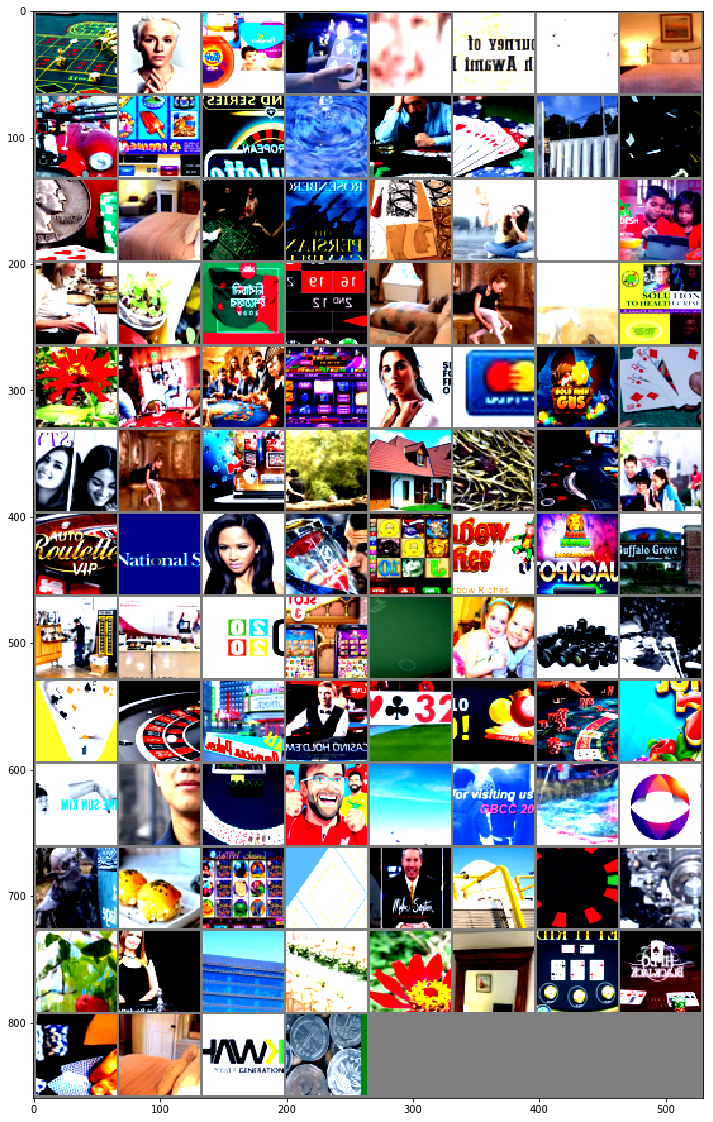

In [14]:

import cv2
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision
import torchvision.datasets as datasets
from torch.autograd import Variable
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

#Transformation for image
transform_ori = transforms.Compose([transforms.RandomResizedCrop(64),   #create 64x64 image
                                    transforms.RandomHorizontalFlip(),    #flipping the image horizontally
                                    transforms.ToTensor(),                 #convert the image to a Tensor
                                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])  #normalize the image
                                    
#Load our dataset
train_dataset = datasets.ImageFolder(root = '/content/gdrive/My Drive/projects/web classification/image_data/training_set',
                                     transform = transform_ori)

test_dataset = datasets.ImageFolder(root = '/content/gdrive/My Drive/projects/web classification/image_data/test_set',
                                    transform = transform_ori)


#Make the dataset iterable
batch_size = 100
train_load = torch.utils.data.DataLoader(dataset = train_dataset, 
                                         batch_size = batch_size,
                                         shuffle = True)      #Shuffle to create a mixed batches of 100 of cat & dog images

test_load = torch.utils.data.DataLoader(dataset = test_dataset, 
                                         batch_size = batch_size,
                                         shuffle = False)
                                         
#Show a batch of images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(20,20))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_load)
images, labels = dataiter.next()


# show images
imshow(torchvision.utils.make_grid(images))

In [0]:
import torch.nn as nn
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        
        self.cnn1 = nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3,stride=1, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(8)        #Batch normalization
        self.relu = nn.ReLU()                 #RELU Activation
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)   #Maxpooling reduces the size by kernel size. 64/2 = 32
        
        self.cnn2 = nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, stride=1, padding=2)
        self.batchnorm2 = nn.BatchNorm2d(32)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)    #Size now is 32/2 = 16
        
        #Flatten the feature maps. You have 32 feature mapsfrom cnn2. Each of the feature is of size 16x16 --> 32*16*16 = 8192
        self.fc1 = nn.Linear(in_features=8192, out_features=4000)   #Flattened image is fed into linear NN and reduced to half size
        self.droput = nn.Dropout(p=0.5)                    #Dropout used to reduce overfitting
        self.fc2 = nn.Linear(in_features=4000, out_features=2000)
        self.droput = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(in_features=2000, out_features=500)
        self.droput = nn.Dropout(p=0.5)
        self.fc4 = nn.Linear(in_features=500, out_features=50)
        self.droput = nn.Dropout(p=0.5)
        self.fc5 = nn.Linear(in_features=50, out_features=2)    #Since there were so many features, I decided to use 45 layers to get output layers. You can increase the kernels in Maxpooling to reduce image further and reduce number of hidden linear layers.
        
    def forward(self,x):
        out = self.cnn1(x)
        out = self.batchnorm1(out)
        out = self.relu(out)
        out = self.maxpool1(out)
        out = self.cnn2(out)
        out = self.batchnorm2(out)
        out = self.relu(out)
        out = self.maxpool2(out)
        #Flattening is done here with .view() -> (batch_size, 32*16*16) = (100, 8192)
        out = out.view(-1,8192)   #-1 will automatically update the batchsize as 100; 8192 flattens 32,16,16
        #Then we forward through our fully connected layer 
        out = self.fc1(out)
        out = self.relu(out)
        out = self.droput(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.droput(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.droput(out)
        out = self.fc4(out)
        out = self.relu(out)
        out = self.droput(out)
        out = self.fc5(out)
        return out


In [0]:

model = CNN()
CUDA = torch.cuda.is_available()
if CUDA:
    model = model.cuda()    
loss_fn = nn.CrossEntropyLoss()        
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


Epoch 1/50, Training Loss: 0.692, Training Accuracy: 53.000, Testing Loss: 0.067, Testing Acc: 15.000, Time: 1610.4723916053772s
Epoch 2/50, Training Loss: 0.692, Training Accuracy: 53.000, Testing Loss: 0.068, Testing Acc: 17.000, Time: 72.86056399345398s
Epoch 3/50, Training Loss: 0.690, Training Accuracy: 55.000, Testing Loss: 0.069, Testing Acc: 71.000, Time: 72.65866327285767s
Epoch 4/50, Training Loss: 0.687, Training Accuracy: 57.000, Testing Loss: 0.069, Testing Acc: 80.000, Time: 73.23985052108765s
Epoch 5/50, Training Loss: 0.684, Training Accuracy: 60.000, Testing Loss: 0.070, Testing Acc: 82.000, Time: 72.64067435264587s
Epoch 6/50, Training Loss: 0.679, Training Accuracy: 63.000, Testing Loss: 0.072, Testing Acc: 83.000, Time: 72.73840737342834s
Epoch 7/50, Training Loss: 0.675, Training Accuracy: 62.000, Testing Loss: 0.074, Testing Acc: 84.000, Time: 72.93401408195496s
Epoch 8/50, Training Loss: 0.668, Training Accuracy: 63.000, Testing Loss: 0.076, Testing Acc: 83.000, 

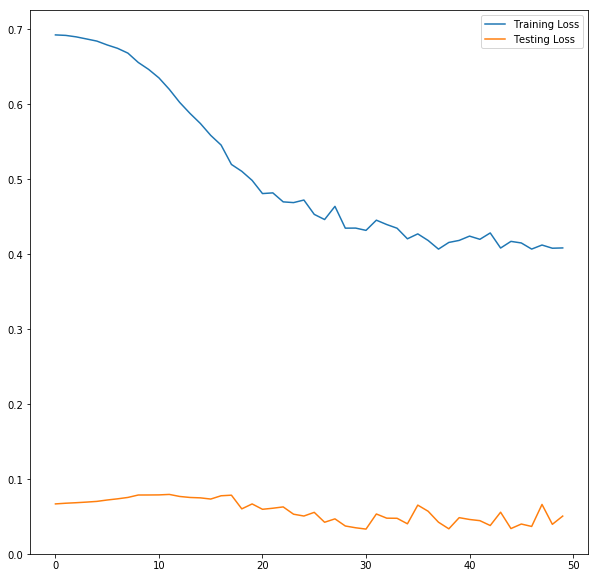

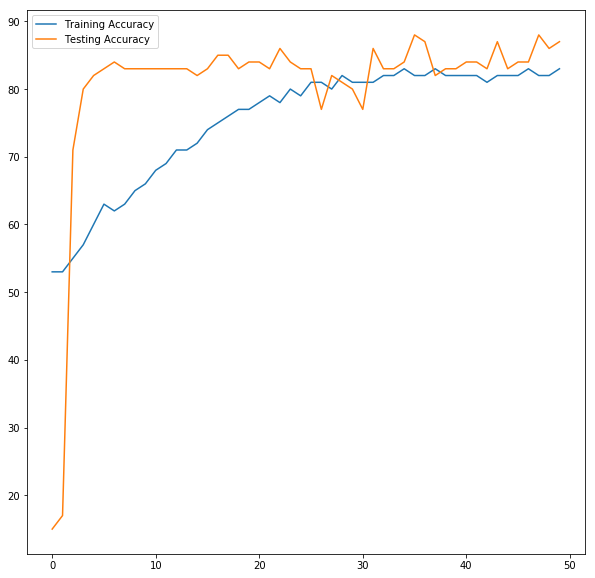

CPU times: user 52min 46s, sys: 2min 20s, total: 55min 7s
Wall time: 1h 26min 16s


In [0]:
#Training the CNN
%%time
import time

num_epochs = 50

#Define the lists to store the results of loss and accuracy
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

#Training
for epoch in range(num_epochs): 
    #Reset these below variables to 0 at the begining of every epoch
    start = time.time()
    correct = 0
    iterations = 0
    iter_loss = 0.0
    
    model.train()                   # Put the network into training mode
    
    for i, (inputs, labels) in enumerate(train_load):
        
        # Convert torch tensor to Variable
        inputs = Variable(inputs)
        labels = Variable(labels)
        
        # If we have GPU, shift the data to GPU
        CUDA = torch.cuda.is_available()
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
        
        optimizer.zero_grad()            # Clear off the gradient in (w = w - gradient)
        outputs = model(inputs)         
        loss = loss_fn(outputs, labels)  
        iter_loss += loss.item()      # Accumulate the loss
        loss.backward()                 # Backpropagation 
        optimizer.step()                # Update the weights
        
        # Record the correct predictions for training data 
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()
        iterations += 1
    
    # Record the training loss
    train_loss.append(iter_loss/iterations)
    # Record the training accuracy
    train_accuracy.append((100 * correct / len(train_dataset)))

    #Testing
    loss = 0.0
    correct = 0
    iterations = 0

    model.eval()                    # Put the network into evaluation mode
    
    for i, (inputs, labels) in enumerate(test_load):
        
        # Convert torch tensor to Variable
        inputs = Variable(inputs)
        labels = Variable(labels)
        
        CUDA = torch.cuda.is_available()
        if CUDA:
            inputs = inputs.cuda()
            labels = labels.cuda()
        
        outputs = model(inputs)     
        loss = loss_fn(outputs, labels) # Calculate the loss
        loss += loss.item()
        # Record the correct predictions for training data
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum()
        
        iterations += 1

    # Record the Testing loss
    test_loss.append(loss/iterations)
    # Record the Testing accuracy
    test_accuracy.append((100 * correct / len(test_dataset)))
    stop = time.time()
    
    print ('Epoch {}/{}, Training Loss: {:.3f}, Training Accuracy: {:.3f}, Testing Loss: {:.3f}, Testing Acc: {:.3f}, Time: {}s'
           .format(epoch+1, num_epochs, train_loss[-1], train_accuracy[-1], test_loss[-1], test_accuracy[-1], stop-start))

# Loss
f = plt.figure(figsize=(10, 10))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()
plt.show()

# Accuracy
f = plt.figure(figsize=(10, 10))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Testing Accuracy')
plt.legend()
plt.show()

#Run this if you want to save the model
torch.save(model.state_dict(),'/content/gdrive/My Drive/projects/web classification/data_out/checkpoint/binary.pth')

#Run this if you want to load the model
# model.load_state_dict(torch.load('binary.pth'))

In [0]:
from google.colab.patches import cv2_imshow
from PIL import Image

model = CNN() 

model.load_state_dict(torch.load('/content/gdrive/My Drive/projects/web classification/data_out/checkpoint/binary.pth'))

def predict(img_name,model):
#     print(img_name)
    image = cv2.imread(img_name)   #Read the image
#     print(image)
    img = Image.fromarray(image)      #Convert the image to an array
    img = transform_ori(img)     #Apply the transformations 
    img = img.view(1,3,64,64)       #Add batch size 
    img = Variable(img)      
    #Wrap the tensor to a variable
    
    model.eval()

    if torch.cuda.is_available():
        model = model.cuda()
        img = img.cuda()

    output = model(img)
#     print(output)
#     print(output.data)
    _, predicted = torch.max(output,1)
    print(predicted.item())
    if predicted.item()==0:
        p = 'gamble'
    else:
        p = 'normal'
    cv2_imshow(image)
    return  p
    


In [15]:

ImageFile.LOAD_TRUNCATED_IMAGES = True
path = '/content/gdrive/My Drive/projects/web classification/image_data/test_img/'

# pred = predict(path + 'rose.jpeg', model)
# print("The Predicted Label is {}".format(pred)) 
# pred = predict(path + 'food.jpg', model)
# print("The Predicted Label is {}".format(pred)) 
# pred = predict(path + 'hamster.jpg', model)
# print("The Predicted Label is {}".format(pred)) 
# pred = predict(path + 'cloth.jpg', model)
# print("The Predicted Label is {}".format(pred)) 

# pred = predict(path + 'gamble2.jpg', model)
# print("The Predicted Label is {}".format(pred)) 
# pred = predict(path + 'gamble3.jpg', model)
# print("The Predicted Label is {}".format(pred)) 
# pred = predict(path + 'gamble4.jpg', model)
# print("The Predicted Label is {}".format(pred)) 
# pred = predict(path + 'gamble5.jpg', model)
# print("The Predicted Label is {}".format(pred)) 
# pred = predict(path + 'gamble6.jpg', model)
# print("The Predicted Label is {}".format(pred)) 
import torch
from torchvision import datasets
import os, os.path

class ImageFolderWithPaths(datasets.ImageFolder):
    """Custom dataset that includes image file paths. Extends
    torchvision.datasets.ImageFolder
    """

    # override the __getitem__ method. this is the method dataloader calls
    def __getitem__(self, index):
        # this is what ImageFolder normally returns
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        # the image file path
        path = self.imgs[index][0]
        # make a new tuple that includes original and the path
        tuple_with_path = (original_tuple + (path,))
        return path

data_dir = path
dataset = ImageFolderWithPaths(data_dir) # our custom dataset
dataloader = torch.utils.data.DataLoader(dataset)
filename = []

for i in range(55):
    name = dataset.__getitem__(i).split('/')[-1]
    filename.append(name)
print(filename)

for i in filename:
  pred = predict(path + '/gamble/' + i, model)
  print("The Predicted Label is {}".format(pred)) 

Output hidden; open in https://colab.research.google.com to view.